Logistic regression 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

importing dataset and showing images from each category

          0         1         2         3         4         5         6  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.690196  0.682353  0.670588  0.670588  0.674510  0.678431  0.678431   
2  0.564706  0.725490  0.749020  0.568627  0.658824  0.517647  0.235294   
3  0.588235  0.490196  0.411765  0.494118  0.349020  0.388235  0.325490   
4  0.980392  0.980392  0.945098  0.929412  0.952941  0.988235  0.968627   

          7         8         9  ...      4087      4088      4089      4090  \
0  1.000000  1.000000  1.000000  ...  0.996078  0.996078  0.996078  0.996078   
1  0.674510  0.662745  0.639216  ...  0.603922  0.458824  0.282353  0.278431   
2  0.305882  0.376471  0.435294  ...  0.529412  0.564706  0.466667  0.439216   
3  0.458824  0.800000  0.905882  ...  0.650980  0.639216  0.639216  0.635294   
4  0.913725  0.976471  0.988235  ...  0.752941  0.784314  0.701961  0.654902   

       4091      4092      4093      4094      4095        label  
0

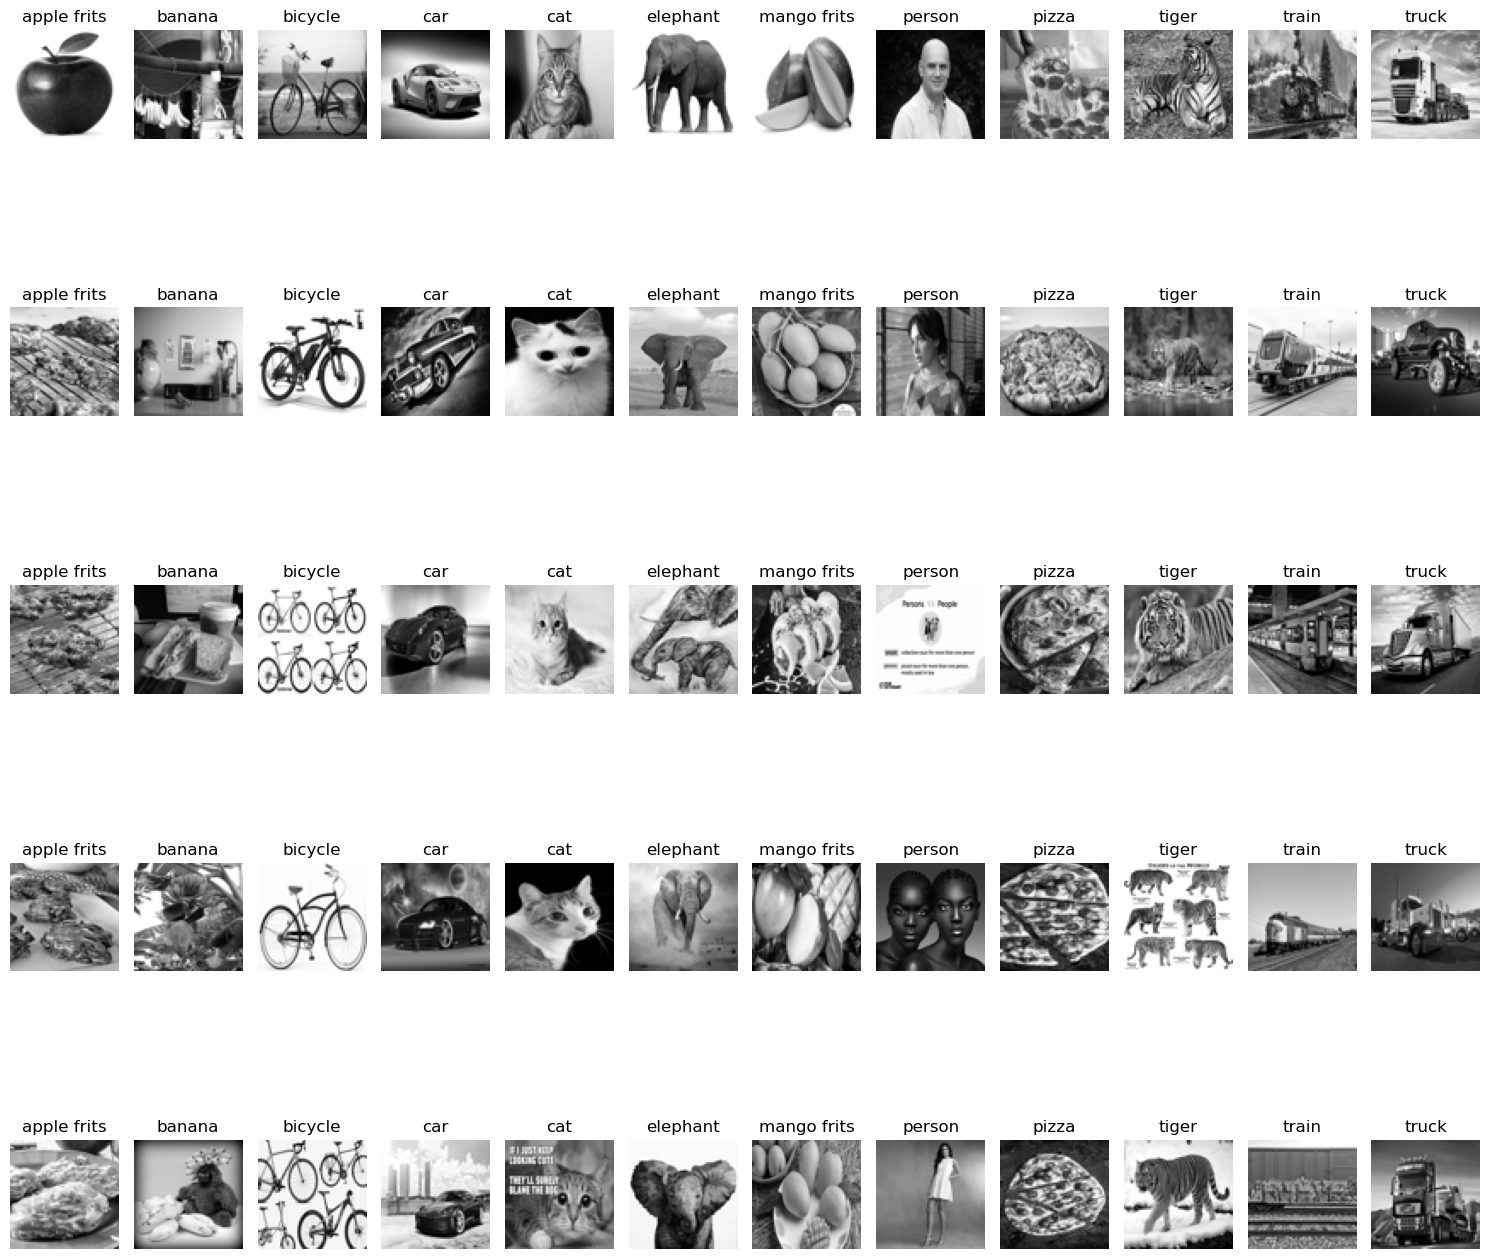

In [78]:
csv_file_path = r"C:\Users\hegde\OneDrive\Desktop\Dataset\grayscale_images.csv"
df = pd.read_csv(csv_file_path)
print(df.head())
categories = df['label'].unique()
num_images = 5  
plt.figure(figsize=(15, num_images * 3))
for i, category in enumerate(categories):
    category_images = df[df['label'] == category].drop('label', axis=1).values
    for j in range(min(num_images, len(category_images))): 
        img_data = category_images[j].reshape(64, 64)  
        plt.subplot(num_images, len(categories), j * len(categories) + i + 1)
        plt.imshow(img_data, cmap='gray')
        plt.axis('off')
        plt.title(category)
plt.tight_layout()
plt.show()

logistic regression

In [80]:
X = df.drop('label', axis=1).values  
y = df['label'].values

df.drop('label', axis=1):
This part of the code is used to create a new DataFrame (X) by dropping the column named 'label' from the original DataFrame df.
The axis=1 argument specifies that you want to drop a column (as opposed to axis=0, which would drop rows).
The result is a DataFrame that contains all the columns except for the 'label' column.

.values:
The .values attribute converts the DataFrame into a NumPy array. So X becomes a NumPy array containing all the feature values from the DataFrame without the 'label' column.

y = df['label'].values:
This line extracts the values from the 'label' column of the DataFrame df.
The resulting y variable is a NumPy array that contains the target labels corresponding to the features in X.

In [81]:
X = X.reshape(X.shape[0], -1)  

The result of this line is that X becomes a 2D array where each row corresponds to a sample and each column corresponds to a feature. This is a common preprocessing step, especially when the original data structure is multi-dimensional and needs to be converted into a flat structure 

In [82]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

the variable X will contain the scaled features, where each feature has a mean of 0 and a standard deviation of 1.
Standardization is a common preprocessing step before feeding data into machine learning algorithms, especially for algorithms that are sensitive to the scale of the data, such as k-nearest neighbors, support vector machines, and neural networks.

In [87]:
categories = np.unique(y)

In [89]:
models = {}
results = {}

The models dictionary is intended to store the machine learning models, while the results dictionary is designed to keep track of their performance metrics after evaluation. This organization helps maintain clarity in your code, especially when working with multiple models.

In [91]:
for category in categories:
    y_binary = (y == category).astype(int)  
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)  
    model = LogisticRegression(max_iter=1000)  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred) 
    report = classification_report(y_test, y_pred, output_dict=True) 
    models[category] = model  
    results[category] = {
        "accuracy": accuracy,
        "classification_report": report
    }

C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hegde\anaconda3\Lib\site-packag

this trains a separate binary logistic regression model for each category in a multi-class classification problem. After training, it evaluates each model's performance and stores the models and their corresponding results in dictionaries. This structure allows for easy comparison and retrieval of model performance metrics across different categories.

This code effectively presents the results of the classification models for each category in a clear and organized manner. The accuracy and the detailed classification report are printed, allowing for easy evaluation of the model's performance for each category. This is particularly useful in a multiclass classification context, where performance can vary significantly across different classes.(down )

In [92]:
for category, result in results.items():
    print(f"\nCategory: {category}")
    print(f"Accuracy: {result['accuracy'] * 100:.2f}%")
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).T)


Category: apple frits
Accuracy: 85.71%
Classification Report:
              precision    recall  f1-score    support
0              0.872340  0.976190  0.921348  42.000000
1              0.500000  0.142857  0.222222   7.000000
accuracy       0.857143  0.857143  0.857143   0.857143
macro avg      0.686170  0.559524  0.571785  49.000000
weighted avg   0.819149  0.857143  0.821473  49.000000

Category: banana
Accuracy: 85.71%
Classification Report:
              precision    recall  f1-score    support
0              0.893617  0.954545  0.923077  44.000000
1              0.000000  0.000000  0.000000   5.000000
accuracy       0.857143  0.857143  0.857143   0.857143
macro avg      0.446809  0.477273  0.461538  49.000000
weighted avg   0.802432  0.857143  0.828885  49.000000

Category: bicycle
Accuracy: 95.92%
Classification Report:
              precision    recall  f1-score    support
0              0.959184  1.000000  0.979167  47.000000
1              0.000000  0.000000  0.000000   2.00

  General Insights:

Accuracy Ranges (85.71% — 95.92%)
The range acuuracy Explanations that this model  provides relatively high accuracy in each categories, as shown above; But with imbalanced data, accuracy can be misleading. Accuracy is the only thing it serves by counting the instances which is correctly predicted, but does not differentiate between the classes.The high accuracy is a direct result of the fact that most observations are from the majority class (Class 0) and that we are able to correctly predict these, as shown by the confusion matrix.(here we have done the logistic regression on the category basis like apple,banana and like this so each category have 15-20 images obviously it is true the class0 is the majority for the model hence there is the reduced value for true positive).

  Imbalanced Data Issue:

Precision, Recall, F1-Score for the Class 1
The model fails miserably in classifying the minority class (Class 1) in pretty much all the categories Class 1 has an F1-scores of zero in categories like banana, bicycle, car, pizza, mango frits and more. Here, it tells me that the model did not find any true positive (any instance from Class 1 correctly classified as 1 line).
It Concluds that The imbalance in favor of Class 0 may end up causing the model to not predict enough instances as Class 1. Because logistic regression might not classify the instances of the majority class properly, work with imbalanced datasets may be more challenging.
Impact:
As the model is more biased towards majority class (class 0), the chances are large for poor performance of the minority class. As just explained, this imbalance is cause for a small recall and precision of that minority class.
In cases where you want to give more importance to predicting the minority class, metrics like recall with respect to Class 1 become indispensable; any model that fails to predict these instances effectively is falling well short in its approach towards dealing with imbalanced data.

  Specific Category Analysis:

Categories include the following severe Class 1 performance issues:
Banana, Bicykle, Car, Pizza, Mango Frits.
For these categories, Class 1 (the minority class) will have a Recall of 0%. This means the model did not predict a single instance of Class 1 correctly.
Reason might be,For these categories, there are very little number of Class 1 samples (usually <5), which does not help the model learn patterns that differentiate between Class 1 and Class 0.or Categories with at least some detection of the minority class.

Apple Frits:
Precision in Class 1 is still better than others but not great at 50%, which has actually IMPROVED and recall increased also.
This means whenever the model predicts Class 1, it is right as much wrong (50% average), but simple missed most of the actual class 1 instances (as per a poor recall).
Cat:
Class 1 has precision and recall at 50% and 33%, respectively. The model is predicting only marginally better for Class 1 where the model is correctly identifying around one third of actual Class 1 cases.
That is better but the recall value is also noting that the model still misses more than half of Class 1 cases. Low class 1 instances (3) left the model less generalizable.
Best-performing cartegories % :
Bicycle, Person, Car, Cat:
Class 0 has good accuracy so these categories achieve higher accuracy (91.84% - 95.92%). Class 0 f-1-scores are good as well going over 95%, in general. This suggests that the model is quite accurate at predicting the majority class.
Classes 1: Categories that perform worst are ;
Banana, Bicycle, Pizza:
In these classes, the model could not predict any class 1 (0 % recall- which means almost complete failure to detect the minority class)

Macro and Weighted Averages:

Macro average: It assigns equal weight irrespective of class imbalance. Which is why it does not work (much) for categories where Class 1 is not identified. Macro average also shows the stark difference in performance on Class 1 (minority) compared to Class 0 (majority).
Eg: In the car category, the macro recall is around 50% that means when considering two classes on an average model works at the rate of only half.

Weighted average: accounts for the class imbalance as we give higher weight to class 0 which is more frequent. Hences, The weighted average of precision, recall and F1-score will always be closer to the Class 0 performance. This is why weighted averages are high compared to overall accuracy.

Group Specific Performance:

Best-performing Categories (For Class 0)
Bicycle:
ACC: 95.92%, Class 0 F1: 97.92%
The model almost always correctly predicts Class 0 (majority class), but is generally less accurate at predicting Class 1 (minority class).
Person:
Accuracy 95.92% F-1 Score for Class 0: 97.87%
Just as in the bicycle category, it over-performs in Class 0 but surprisingly failed to pick up any of the samples from Class 1.
Car:
As for the accuracy, it was 91.84% and for F1-score Class-0: 95.74%.
It clearly shows with the two added arrows above that the Class 0 can be handled by the model, however, Class 1 is literally not caught at all.
Cat:
Accuracy: 93.88% F1-score for Class 0: 96.77%
Well, the model is still good but not as impressive for other categories as it was for majority classes.

Top failure Categories to detect Class 1 
No recall: Obviously that model is not capable of predicting anything positive in this class (paper cup, bicycle Class1).
Banana: Class 1 with 0 recall, which means that the minority class has not been predicted correctly.
Class 1 (pizza): Recall is 0%. This means that the minority class is not detected at all.



sujjetions:
Recommendations to Improve Class 1 Detection
Handling Imbalanced Data:
Over- and undersampling techniques: Better still, use the oversampling technique to level the field of your dataset or do undersampling from the majority class to give the model more chances to learn from minority class examples.
Class Weights: In logistic regression, you can assign different weights to classes in order to penalize the model more heavily for misclassifying the minority class, which will force the model to pay more attention to them.
Different Models: There are many models that do not have problems with the handling of imbalanced data; for example, decision trees, or even random forests can be chosen. Sometimes, even specialized algorithms include some in-built mechanisms to handle class imbalance like XGBoost. Evaluation Metrics:
For skewed data, precision and recall are more informative measures than accuracy. Here, for the minority class, you would look at recall more as missing instances of the minority class can be drastic at times, depending on the application.
And in the case of balanced F1-score, the harmonic mean of precision and recall itself provides a better balance of the two, especially when it comes to the minority class.

In [96]:
for category in categories:
    y_binary = (y == category).astype(int)  
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)  
    model = LogisticRegression(max_iter=1000)  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred) 
    report = classification_report(y_test, y_pred, output_dict=True) 
    models[category] = model  
    results[category] = {
        "accuracy": accuracy,
        "classification_report": report
    }

C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hegde\anaconda3\Lib\site-packag

In [98]:
for category, result in results.items():
    print(f"\nCategory: {category}")
    print(f"Accuracy: {result['accuracy'] * 100:.2f}%")
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).T)


Category: apple frits
Accuracy: 90.41%
Classification Report:
              precision    recall  f1-score   support
0              0.927536  0.969697  0.948148  66.00000
1              0.500000  0.285714  0.363636   7.00000
accuracy       0.904110  0.904110  0.904110   0.90411
macro avg      0.713768  0.627706  0.655892  73.00000
weighted avg   0.886540  0.904110  0.892099  73.00000

Category: banana
Accuracy: 89.04%
Classification Report:
              precision    recall  f1-score    support
0              0.928571  0.955882  0.942029  68.000000
1              0.000000  0.000000  0.000000   5.000000
accuracy       0.890411  0.890411  0.890411   0.890411
macro avg      0.464286  0.477941  0.471014  73.000000
weighted avg   0.864971  0.890411  0.877506  73.000000

Category: bicycle
Accuracy: 95.89%
Classification Report:
              precision    recall  f1-score    support
0              0.958904  1.000000  0.979021  70.000000
1              0.000000  0.000000  0.000000   3.000000
a

General Interpretation:
Accuracy:
For the respective class, accuracy lies between 86.30% and 95.89%.
Though accuracy provides an overall view regarding how a model has performed it is, in reality, deceptive for imbalanced data sets too, such as banana, bicycle, and cat.
Precision:
Precision provides the percentage of true positives with respect to total predicted positives. Precision for bicycle class is 0.958; the model makes good predictions for class '0', which is the major class.
For minority classes (such as 1 in banana, mango frits, and cat), precision is very low or even 0, meaning the model actually has a problem with those categories.
Recall:

Recall is the fraction of true positives of all actual positives. Similar to precision, recall of class 0 is very high, but class 1 is very low for most categories like car, cat, pizza, and truck.
That means the model has missed many positive instances of the minority class since it is low on the class 1 recall.
F1 Score:

The F1-score is a harmonic mean of the precision and recall, making it a good scoring function for models in imbalanced datasets. For example, categories such as elephant (F1 = 0.925 for class 0) reveal that the model performs well on majority classes but has very poor F1-scores on minority classes across categories; therefore, the model fails to cope with imbalanced data.
Insights from Imbalanced Data
The dataset is highly imbalanced except for the majority class. The instances for class 0 outnumber the instances for class 1. The above imbalance leads to a sequence of problems:

Majority Class Dominance:

The model generally focused on the prediction of the majority class 0 with high accuracy and precision but neglected minority class 1. For example, bike and pizza categories have high precision values for class 0 but 0 precision values for class 1.
Recall for Minority Class:

It fails to detect the instances of the minority class because the recall for class 1 is relatively very low for all categories. For example, Recall = 0 for class 1 when the input is banana or cat, which means almost all the instances of the minority class are missing.
F1-Score and Class Imbalance:

F1 scores for class 1 in most of the categories range from very low to 0, respectively (for example, banana, cat, mango frits). This means that although it is performing well on the majority class, it actually isn't much of a help in finding the minority class.
Macro vs. Weighted Averages:

Macro avg gives equal weights to both the classes irrespective of the instances and have low scores of all types like mango frits and truck indicating overall poor performance of the model.
Weighted avg considers the class imbalance and displays comparatively better scores since it is affected by the performance of the majority class.

Category-wise Interpretation:
1. Apple Frits
Accuracy: 90.41%
Class 0 (Majority Class): High precision (92.75%) and recall (96.97%) indicate that the model performs well in identifying class 0.
Class 1 (Minority Class): Low precision (50%) and recall (28.57%) reflect that the model struggles to correctly identify instances of class 1, likely due to class imbalance.
Overall: The weighted average F1-score of 89.21% suggests that the model’s performance is skewed towards class 0, with much poorer performance on class 1.
2. Banana
Accuracy: 89.04%
Class 0: Strong performance with high precision (92.86%) and recall (95.59%).
Class 1: Zero precision and recall for class 1 indicate that the model is unable to identify any true positives for class 1, which may be due to the very small number of class 1 samples (5).
Overall: The model is heavily biased towards predicting class 0, as class 1 is rarely detected.
3. Bicycle
Accuracy: 95.89%
Class 0: Excellent performance for class 0 with precision and recall at 95.89% and 100%, respectively.
Class 1: The model completely fails to detect class 1, with zero precision, recall, and F1-score. This could be attributed to the small sample size of class 1 (3).
Overall: This highlights a significant issue with class imbalance, where the model is biased towards predicting the majority class.
4. Car
Accuracy: 91.78%
Class 0: Very strong performance, with perfect recall (100%) and high precision (91.67%) for class 0.
Class 1: Precision is 100%, but recall is only 14.29%, meaning the model detects class 1 rarely and only for a few instances.
Overall: The model shows good accuracy but fails to consistently detect class 1, suggesting that the performance on the minority class is weak.
5. Cat
Accuracy: 90.41%
Class 0: Precision and recall are high (91.67% and 98.51%, respectively), showing that the model performs well in identifying class 0.
Class 1: No correct predictions for class 1 (precision and recall are both zero).
Overall: Class imbalance is evident as the model cannot detect class 1 at all, making it highly biased towards class 0.
6. Elephant
Accuracy: 86.30%
Class 0: High precision (88.57%) and recall (96.88%) indicate strong performance for class 0.
Class 1: Precision is 33.33%, but recall is only 11.11%, meaning the model struggles to identify true positives for class 1.
Overall: This category highlights a typical case of imbalanced performance, where the model heavily favors class 0.
7. Mango Frits
Accuracy: 91.78%
Class 0: High precision (93.06%) and recall (98.53%) reflect strong performance for the majority class.
Class 1: The model fails to predict any instances of class 1, with zero precision, recall, and F1-score.
Overall: Like many other categories, the model performs poorly on the minority class.
8. Person
Accuracy: 93.15%
Class 0: Precision and recall are high (95.65% and 97.06%, respectively), indicating good performance for class 0.
Class 1: Moderate improvement in class 1 detection, with precision at 50% and recall at 40%, showing that the model makes some correct predictions for class 1 but still struggles with recall.
Overall: The model performs better on class 1 than in other categories, though improvement is still needed.
9. Pizza
Accuracy: 93.15%
Class 0: Very high precision (93.15%) and perfect recall (100%), indicating excellent performance for class 0.
Class 1: The model fails to detect any instances of class 1, with zero precision, recall, and F1-score.
Overall: Class imbalance is evident, and the model is highly biased towards predicting class 0.
10. Tiger
Accuracy: 87.67%
Class 0: Precision and recall are strong for class 0, at 90.14% and 96.97%, respectively.
Class 1: The model fails to detect class 1 (zero precision and recall).
Overall: The model’s performance is again skewed towards class 0, with no correct predictions for class 1.
11. Train
Accuracy: 87.67%
Class 0: Similar to the tiger category, strong precision (90.14%) and recall (96.97%) for class 0.
Class 1: No detection of class 1 (zero precision and recall).
Overall: The model is highly biased towards class 0, with no successful detection of class 1.
12. Truck
Accuracy: 90.41%
Class 0: Precision is high (90.41%) with perfect recall (100%), showing excellent performance for class 0.
Class 1: No correct predictions for class 1, with zero precision, recall, and F1-score.
Overall: The model is biased towards predicting class 0, as it completely fails to detect class 1.